In [2]:
from sklearn.datasets import make_blobs

In [3]:
X,y = make_blobs(n_samples = 150,     # 150개
                 n_features = 2,      # 2차원
                 centers = 3,         # 3개의 클러스터 혹은 중심
                 cluster_std = 0.5,   # 클러스터의 표준편차
                 shuffle = True,      # 무작위로 섞을 것인가?
                 random_state=0)      # seed 값

In [4]:
import matplotlib.pyplot as plt

### 2차원 산전도 도시

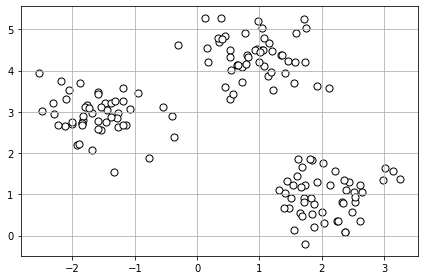

In [5]:
plt.scatter(X[:,0],
            X[:,1],
            c = 'white',
            marker = 'o',
            edgecolor = 'black',
            s = 50)
plt.grid()
plt.tight_layout()
plt.show()

In [6]:
from sklearn.cluster import KMeans

In [7]:
km = KMeans(n_clusters = 3,      # 클러스터 개수
           init = 'random',      # k평균 알고리즘 설정, 초기 중심 좌표를 무작위로 선정
           n_init=10,            # 각각의 센트로이드에서 독립적으로 몇 번을 실행하여 가장 낮은 제곱 오차합 값을 찾아냄 
           max_iter=300,         # 2번째와 3번째 과정을 최대 몇번까지 반복할 것인지 설정
            tol = 1e-04,         # 허용 오차 값에 도달하면 일찍 종료
            random_state=0)

In [8]:
y_km = km.fit_predict(X)  # 예측 클러스터 레이블 생성

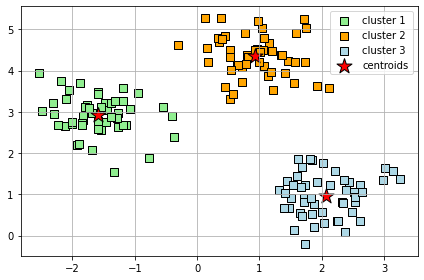

In [9]:
plt.scatter(X[y_km == 0,0],
           X[y_km == 0,1],
           s=50, c='lightgreen',
           marker = 's', edgecolor='black',
           label='cluster 1')

plt.scatter(X[y_km == 1,0],
           X[y_km == 1,1],
           s=50, c='orange',
           marker = 's', edgecolor='black',
           label='cluster 2')

plt.scatter(X[y_km == 2,0],
           X[y_km == 2,1],
           s=50, c='lightblue',
           marker = 's', edgecolor='black',
           label='cluster 3')

plt.scatter(km.cluster_centers_[:,0],
           km.cluster_centers_[:,1],
           s=250, c='red',
           marker = '*', edgecolor='black',
           label='centroids')

plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

### K-means++ 알고리즘(현명한 초기 센트로이드 할당)

In [10]:
# 권장되는 기본 설정값
km = KMeans(n_clusters = 3,      # 클러스터 개수
           init = 'k-means++',   # k평균++ 알고리즘 설정
           n_init=10,            # 각각의 센트로이드에서 독립적으로 몇 번을 실행하여 가장 낮은 제곱 오차합 값을 찾아냄 
           max_iter=300,         # 2번째와 3번째 과정을 최대 몇번까지 반복할 것인지 설정
            tol = 1e-04,         # 허용 오차 값에 도달하면 일찍 종료
            random_state=0)

In [11]:
print('왜곡 : %.2f' %km.inertia_)

AttributeError: 'KMeans' object has no attribute 'inertia_'

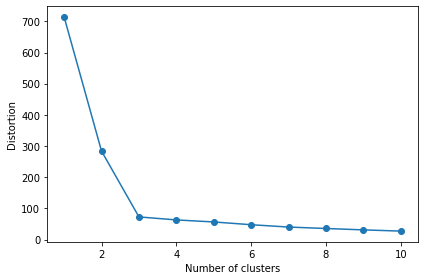

In [12]:
distortions = []
for i in range(1,11):
    km = KMeans(n_clusters = i,      # 클러스터 개수
           init = 'k-means++',   # k평균++ 알고리즘 설정
           n_init=10,            # 각각의 센트로이드에서 독립적으로 몇 번을 실행하여 가장 낮은 제곱 오차합 값을 찾아냄 
           max_iter=300,         # 2번째와 3번째 과정을 최대 몇번까지 반복할 것인지 설정
            tol = 1e-04,         # 허용 오차 값에 도달하면 일찍 종료
            random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1,11), distortions, marker= 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

### 실루엣 그래프

In [13]:
from sklearn.metrics import silhouette_samples

In [14]:
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')

### 클러스터 3개

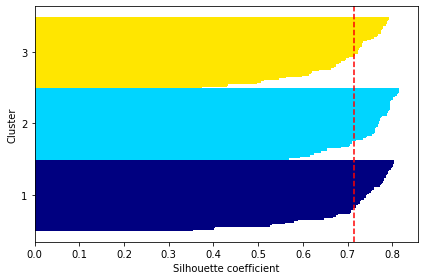

In [19]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters = 3,      # 클러스터 개수
       init = 'k-means++',   # k평균++ 알고리즘 설정
       n_init=10,            # 각각의 센트로이드에서 독립적으로 몇 번을 실행하여 가장 낮은 제곱 오차합 값을 찾아냄 
       max_iter=300,         # 2번째와 3번째 과정을 최대 몇번까지 반복할 것인지 설정
        tol = 1e-04,         # 허용 오차 값에 도달하면 일찍 종료
        random_state=0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(X, y_km, metric = 'euclidean')

y_ax_lower, y_ax_upper = 0,0
yticks = []
for i,c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters )
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height = 1.0,
            edgecolor = 'none', color = color)
    
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color ="red", linestyle="--")

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel("Cluster")
plt.xlabel("Silhouette coefficient")

plt.tight_layout()
plt.show()

### 클러스터 2개

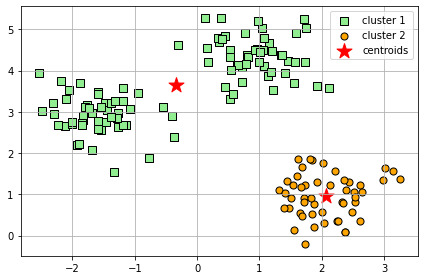

In [26]:
km = KMeans(n_clusters = 2,      # 클러스터 개수
       init = 'k-means++',   # k평균++ 알고리즘 설정
       n_init=10,            # 각각의 센트로이드에서 독립적으로 몇 번을 실행하여 가장 낮은 제곱 오차합 값을 찾아냄 
       max_iter=300,         # 2번째와 3번째 과정을 최대 몇번까지 반복할 것인지 설정
        tol = 1e-04,         # 허용 오차 값에 도달하면 일찍 종료
        random_state=0)
y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0,0],
           X[y_km == 0,1],
           s=50,
           c='lightgreen',
           edgecolor='black',
           marker='s',
           label='cluster 1')
plt.scatter(X[y_km == 1,0],
           X[y_km == 1,1],
           s=50,
           c='orange',
           edgecolor='black',
           marker='o',
           label='cluster 2')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],
           s = 250, marker='*', c='red', label='centroids')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

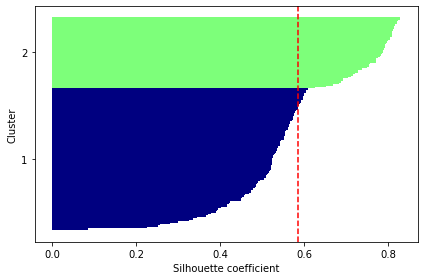

In [27]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(X, y_km, metric = 'euclidean')

y_ax_lower, y_ax_upper = 0,0
yticks = []
for i,c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters )
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height = 1.0,
            edgecolor = 'none', color = color)
    
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color ="red", linestyle="--")

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel("Cluster")
plt.xlabel("Silhouette coefficient")

plt.tight_layout()
plt.show()